In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

from time import time
from fakeNIR import fakeNIR
from utils import convert_to_tensor, de_normalize, load_image

from ipywidgets import FileUpload
from IPython.display import display

In [12]:
# Paths de archivos:
GLOBAL_PATH = os.path.abspath(os.curdir)

IMG_HEIGHT = 960
IMG_WIDTH =  1280

BATCH_SIZE = 2

print(GLOBAL_PATH)

e:\Dev\Git\fakeNIR\model


In [4]:
model = fakeNIR(batch_size = BATCH_SIZE, work_path=GLOBAL_PATH)

In [5]:
import io
from PIL import Image
import time

def predict(change):
    
    image = change['new'][-1]['content']
    
    image = Image.open(io.BytesIO(image))
    image = convert_to_tensor(np.asarray(image))
    
    print('Starting prediction')
    start = time.time()
    
    out = model.predict(image)
    
    print('Prediction took {:.2f} seconds'.format(time.time() - start))
    
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(de_normalize(image[0, ...]))
    plt.subplot(1, 2, 2)
    plt.imshow(out[0, ...])

Starting prediction
Prediction took 15.42 seconds


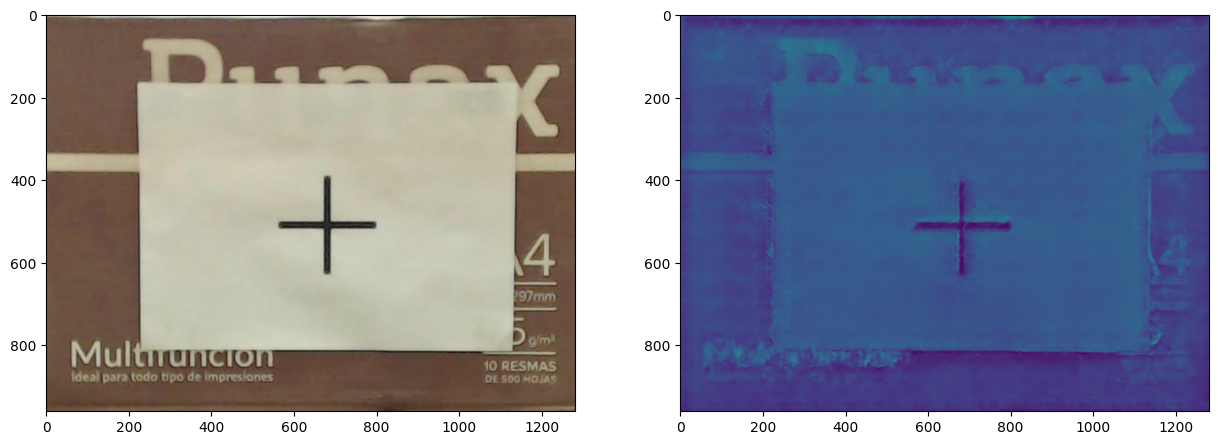

In [6]:
image = load_image('rgb.jpg')
print('Starting prediction')
start = time.time()

out = model.predict(image)
    
print('Prediction took {:.2f} seconds'.format(time.time() - start))

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(de_normalize(image[0, ...]))
plt.subplot(1, 2, 2)
plt.imshow(out[0, ...])

In [7]:
upload = FileUpload(accept='.jpg,.png')
display(upload)
upload.observe(predict, names='value')

FileUpload(value=(), accept='.jpg,.png', description='Upload')